#Import Library

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=a7298579b6e7a1060b004174077ff66aeba75b5d703289f927475de8f41162da
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
!pip install apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2455 sha256=fb1a3fe1c9da296af6fc3ed88b0d03e65efe39caa5213e821a0c5cae1f4757bb
  Stored in directory: /root/.cache/pip/wheels/8c/fa/83/25b9cb17d884f97f2e62d97d0818bbed8117e89a6b09c37dc3
Successfully built apriori


In [3]:
!pip install networkx==2.3
!pip install mlxtend==0.14.0
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

from warnings import filterwarnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556003 sha256=f431f3160683feaa3b0cae1452f9c86a1fdf9066e6829c91f0a7bfd8777582ab
  Stored in directory: /root/.cache/pip/wheels/a2/61/d8/147fad6a09bfd85366862c93d34556b9e155ce7690f8c0aa13
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━

#Import Dataset Kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdaffaalfikri","key":"a78463a07a1a19d94875f1f001178055"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle datasets download -d akashdeepkuila/bakery

  0% 0.00/116k [00:00<?, ?B/s]
100% 116k/116k [00:00<00:00, 68.9MB/s]


In [7]:
!mkdir bakery
!unzip bakery.zip  -d bakery
!ls bakery

Archive:  bakery.zip
  inflating: bakery/Bakery.csv       
Bakery.csv


#Data Discovery

In [8]:
df = pd.read_csv("/content/bakery/Bakery.csv")
print("DataFrame shape:", df.shape)
df.head()

DataFrame shape: (20507, 5)


,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [9]:
df.sample(10)

,TransactionNo,Items,DateTime,Daypart,DayType
2415,1173,Coffee,2016-12-11 14:22:20,Afternoon,Weekend
12033,5960,Soup,2017-04-02 14:18:23,Afternoon,Weekend
16236,7739,Pastry,2017-07-03 11:13:53,Morning,Weekday
11476,5708,Tea,2017-01-31 15:00:05,Afternoon,Weekday
13648,6648,Coffee,2017-02-16 12:45:14,Afternoon,Weekday
1919,934,My-5 Fruit Shoot,2016-09-11 16:02:24,Afternoon,Weekday
7630,3846,Bread,2016-12-24 16:19:40,Afternoon,Weekend
18293,8686,Baguette,2017-03-24 11:32:31,Morning,Weekday
2720,1315,Hearty & Seasonal,2016-11-14 13:09:13,Afternoon,Weekday
14196,6857,Coffee,2017-02-19 12:38:58,Afternoon,Weekend


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [11]:
df.describe()

,TransactionNo
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [12]:
val_counts = df["Items"].value_counts()
val_counts.tail(10)

Chimichurri Oil    2
Siblings           2
Chicken sand       1
The BART           1
Adjustment         1
Bacon              1
Gift voucher       1
Olum & polenta     1
Raw bars           1
Polenta            1
Name: Items, dtype: int64

#Data Preparation

In [13]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB
None


In [14]:
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   TransactionNo          Items             DateTime  Daypart  DayType
0              1          Bread  2016-10-30 09:58:11  Morning  Weekend
1              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
2              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
3              3  Hot chocolate  2016-10-30 10:07:57  Morning  Weekend
4              3            Jam  2016-10-30 10:07:57  Morning  Weekend
5              3        Cookies  2016-10-30 10:07:57  Morning  Weekend
6              4         Muffin  2016-10-30 10:08:41  Morning  Weekend
7              5         Coffee  2016-10-30 10:13:03  Morning  Weekend
8              5         Pastry  2016-10-30 10:13:03  Morning  Weekend
9              5          Bread  2016-10-30 10:13:03  Morning  Weekend


In [15]:
print('Unique Items: ', df['Items'].nunique())

Unique Items:  94


In [16]:
print('Unique Items: ', df['Items'].nunique())
print( '\n', df['Items'].unique())

Unique Items:  94

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbr

In [17]:
print(df.isnull().sum().sort_values(ascending=False))

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64


In [18]:
print(df[df['Items']=='NONE'])

Empty DataFrame
Columns: [TransactionNo, Items, DateTime, Daypart, DayType]
Index: []


In [20]:
df['Year'] = df['DateTime'].apply(lambda x: x.split("-")[0])
df['Month'] = df['DateTime'].apply(lambda x: x.split("-")[1])
df['Day'] = df['DateTime'].apply(lambda x: x.split("-")[2])

In [21]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
 5   Year           20507 non-null  object
 6   Month          20507 non-null  object
 7   Day            20507 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.3+ MB
None
   TransactionNo          Items             DateTime  Daypart  DayType  Year  \
0              1          Bread  2016-10-30 09:58:11  Morning  Weekend  2016   
1              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend  2016   
2              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend  2016   
3              3  Hot chocolate  2016-10-30 10:07:57  Morning  Weekend  2016   
4      

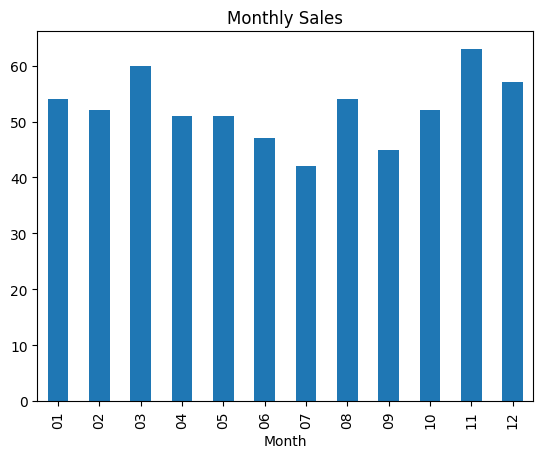

In [26]:
df.groupby('Month')['Items'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

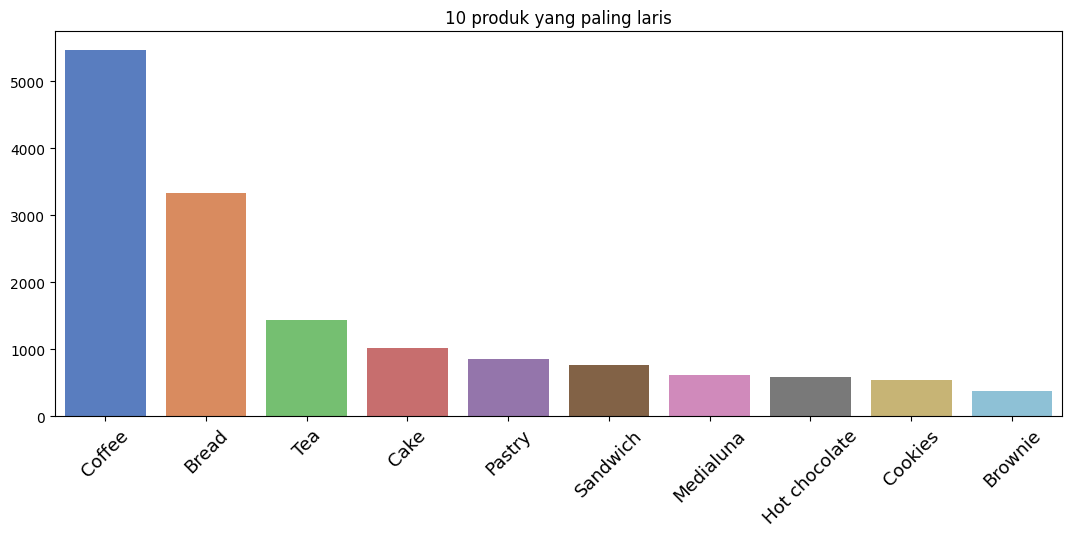

In [27]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = df["Items"].value_counts()[:10].index,
            y = df["Items"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 produk yang paling laris')
plt.show()

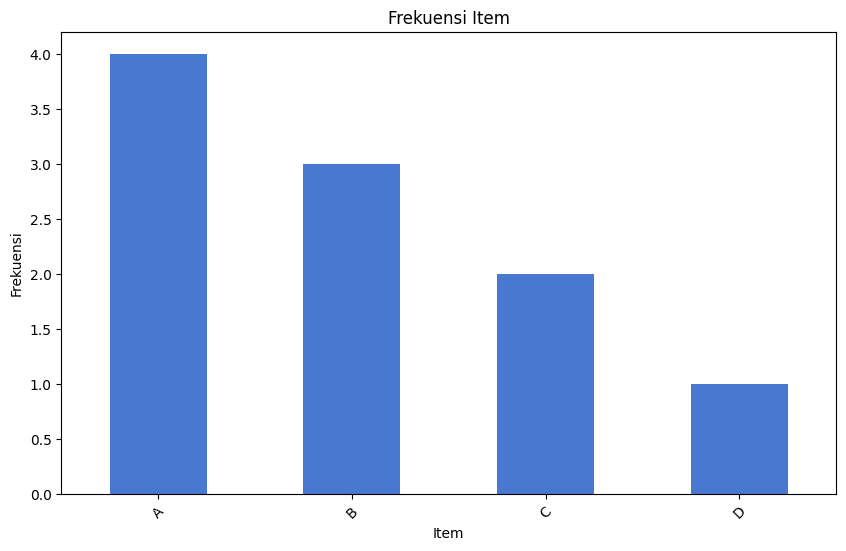

In [38]:
def item_frequency_plot(transactions, topN):

    item_counts = transactions.value_counts().head(topN)

    plt.figure(figsize=(10, 6))
    item_counts.plot(kind='bar')
    plt.title('Frekuensi Item')
    plt.xlabel('Item')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.show()

transactions = pd.Series(['A', 'B', 'C', 'A', 'B', 'D', 'A', 'C', 'B', 'A'])
item_frequency_plot(transactions, topN=5)

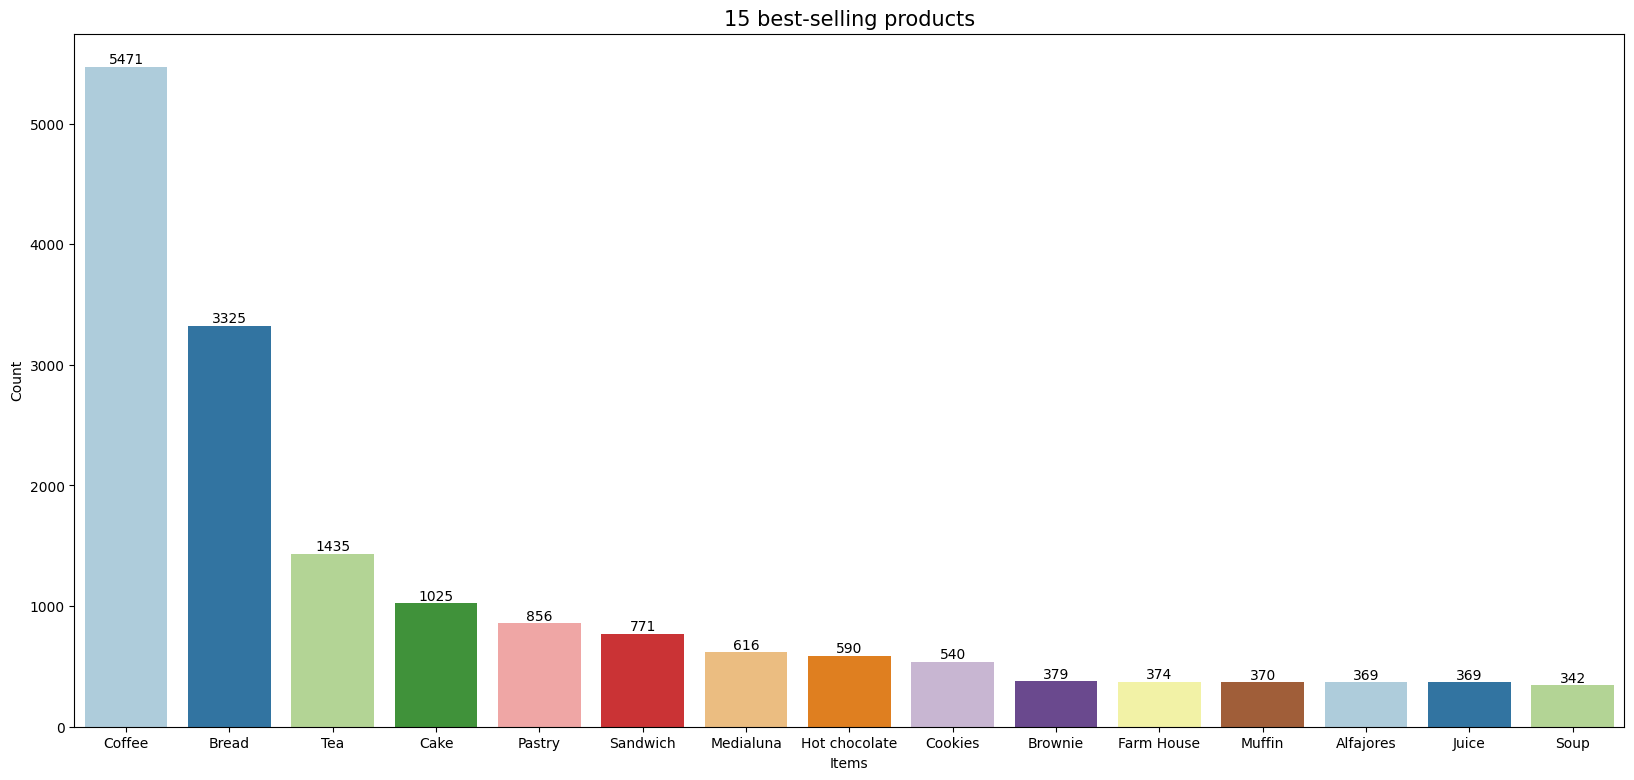

In [45]:
products=df["Items"].value_counts().head(15).reset_index(name="Count")
products=products.rename(columns={"index":"Items"})
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("15 best-selling products",size=15)

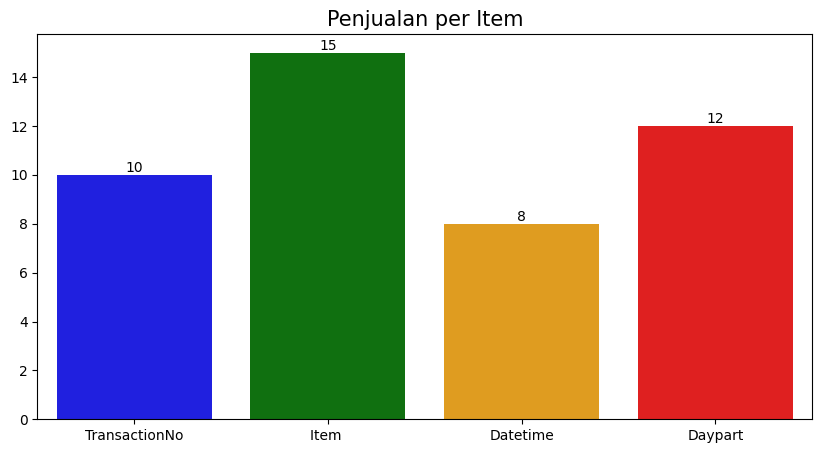

In [52]:
dataItems = {
    "Items": ["TransactionNo", "Item ", "Datetime", "Daypart"],
    "TransactionNo": [10, 15, 8, 12]
}

colors = ["blue", "green", "orange", "red"]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Items", y="TransactionNo", data=dataItems, palette=colors)

for i in ax.containers:
    ax.bar_label(i)

plt.title("Penjualan per Item", size=15)
plt.show()

#Visualisasi

In [53]:
most_sold = df['Items'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Items, dtype: int64


In [54]:
transaction_count = df.groupby(by='Items')[['TransactionNo']].count().sort_values(by='TransactionNo', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,TransactionNo
Items,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


In [55]:
transaction_list = []

for i in df['TransactionNo'].unique():
    tlist = list(set(df[df['TransactionNo']==i]['TransactionNo']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [57]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [64]:
import itertools

def generate_candidates(prev_candidates, k):
    candidates = set()
    for i in range(len(prev_candidates)):
        for j in range(i + 1, len(prev_candidates)):
            itemset1 = set(prev_candidates[i])
            itemset2 = set(prev_candidates[j])
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                candidates.add(tuple(sorted(union_set)))
    return list(candidates)

def prune_candidates(candidates, prev_frequent_sets):
    pruned_candidates = []
    for candidate in candidates:
        subsets = [set(x) for x in itertools.combinations(candidate, len(candidate) - 1)]
        is_valid = all(subset in prev_frequent_sets for subset in subsets)
        if is_valid:
            pruned_candidates.append(candidate)
    return pruned_candidates

def apriori(transactions, min_support):
    itemsets = [frozenset([item]) for item in set(item for transaction in transactions for item in transaction)]
    frequent_itemsets = []

    k = 2
    while itemsets:
        candidates = generate_candidates(itemsets, k)
        item_counts = {candidate: 0 for candidate in candidates}

        for transaction in transactions:
            for candidate in candidates:
                if set(candidate).issubset(transaction):
                    item_counts[candidate] += 1

        frequent_itemsets_k = [itemset for itemset, count in item_counts.items() if count / len(transactions) >= min_support]
        frequent_itemsets.extend(frequent_itemsets_k)

        itemsets = prune_candidates(generate_candidates(frequent_itemsets_k, k+1), frequent_itemsets_k)
        k += 1

    return frequent_itemsets

# Contoh Penggunaan
transactions = [
    ['Coffee', 'Bread', 'Tea','Cake','Pastry'],
]

min_support = 0.2
result = apriori(transactions, min_support)
print("Frequent Itemsets:")
print(result)

Frequent Itemsets:
[('Bread', 'Cake'), ('Coffee', 'Tea'), ('Cake', 'Tea'), ('Bread', 'Pastry'), ('Cake', 'Coffee'), ('Cake', 'Pastry'), ('Bread', 'Tea'), ('Coffee', 'Pastry'), ('Bread', 'Coffee'), ('Pastry', 'Tea')]
